In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
health_df = pd.read_csv('dataset/Health_conditions_among_children_under_age_18__by_selected_characteristics__United_States.csv')

In [5]:
health_df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,1997-1999,1,Under 18 years,0.0,NaN,NaN,...
1,Health conditions among children under age 18,Current asthma among persons under 18 years,1,"Percent of children, crude",1,Total,0,Under 18 years,0.00,2000-2002,2,Under 18 years,0.0,NaN,NaN,...
2,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,1997-1999,1,10-17 years,2.2,7.6,0.2,NaN
3,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,2000-2002,2,10-17 years,2.2,9.0,0.3,NaN
4,Health conditions among children under age 18,ADHD among persons under 18 years,3,"Percent of children, crude",1,Age,1,10-17 years,1.22,2003-2005,3,10-17 years,2.2,8.9,0.3,NaN


## Data Analysis

In [6]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2744 non-null   object 
 1   PANEL           2744 non-null   object 
 2   PANEL_NUM       2744 non-null   int64  
 3   UNIT            2744 non-null   object 
 4   UNIT_NUM        2744 non-null   int64  
 5   STUB_NAME       2744 non-null   object 
 6   STUB_NAME_NUM   2744 non-null   int64  
 7   STUB_LABEL      2744 non-null   object 
 8   STUB_LABEL_NUM  2744 non-null   float64
 9   YEAR            2744 non-null   object 
 10  YEAR_NUM        2744 non-null   int64  
 11  AGE             2744 non-null   object 
 12  AGE_NUM         2744 non-null   float64
 13  ESTIMATE        2516 non-null   float64
 14  SE              2516 non-null   float64
 15  FLAG            287 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 343.1+ KB


In [7]:
health_df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
PANEL_NUM,2744.0,5.0,2.0,1.0,2.0,5.0,7.0,8.0
UNIT_NUM,2744.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
STUB_NAME_NUM,2744.0,4.0,2.0,0.0,2.0,3.0,5.0,6.0
STUB_LABEL_NUM,2744.0,4.0,2.0,0.0,2.0,4.0,5.0,6.0
YEAR_NUM,2744.0,8.0,4.0,1.0,4.0,8.0,11.0,14.0
AGE_NUM,2744.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
ESTIMATE,2516.0,8.0,4.0,1.0,5.0,7.0,11.0,22.0
SE,2516.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [8]:
health_df.isna().values.sum()

2913

In [9]:
health_df.isna().sum()

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           228
SE                 228
FLAG              2457
dtype: int64

In [10]:
health_df['FLAG']

0       ...
1       ...
2       NaN
3       NaN
4       NaN
       ... 
2739    NaN
2740    NaN
2741    NaN
2742    NaN
2743    NaN
Name: FLAG, Length: 2744, dtype: object

In [11]:
health_df.drop('FLAG', inplace=True, axis=1)

### Missed Value

In [12]:
health_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [13]:
health_df.dropna(axis=0, inplace=True)

In [14]:
def df_convert_dtype(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [15]:
numeric_cols = health_df.select_dtypes(np.number).columns

In [16]:
health_df = df_convert_dtype(health_df, np.int64, np.float64)

In [17]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 2 to 2743
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       2742 non-null   object 
 1   PANEL           2742 non-null   object 
 2   PANEL_NUM       2742 non-null   float64
 3   UNIT            2742 non-null   object 
 4   UNIT_NUM        2742 non-null   float64
 5   STUB_NAME       2742 non-null   object 
 6   STUB_NAME_NUM   2742 non-null   float64
 7   STUB_LABEL      2742 non-null   object 
 8   STUB_LABEL_NUM  2742 non-null   float64
 9   YEAR            2742 non-null   object 
 10  YEAR_NUM        2742 non-null   float64
 11  AGE             2742 non-null   object 
 12  AGE_NUM         2742 non-null   float64
 13  ESTIMATE        2742 non-null   float64
 14  SE              2742 non-null   float64
dtypes: float64(8), object(7)
memory usage: 342.8+ KB


In [28]:
health_df['STUB_NAME'].unique()

array(['Age', 'Total', 'Sex', 'Race', 'Hispanic origin and race',
       'Percent of poverty level',
       'Health insurance status at the time of interview'], dtype=object)

In [29]:
health_df.groupby('STUB_NAME').mean()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
STUB_NAME,,,,,,,,
Age,4.566667,1.0,1.0,1.1880,7.500000,1.75619,8.411429,0.299762
Health insurance status at the time of interview,4.500000,1.0,6.0,6.1325,7.500000,0.00000,8.107366,0.365402
Hispanic origin and race,4.500000,1.0,4.0,4.1825,7.500000,0.00000,8.493527,0.345759
Percent of poverty level,4.500000,1.0,5.0,5.2500,7.500000,0.00000,8.454911,0.409152
Race,4.500000,1.0,3.0,3.3500,7.500000,0.00000,8.419792,0.857217
Sex,4.500000,1.0,2.0,2.1500,7.500000,0.00000,8.361161,0.271875
Total,4.926829,1.0,0.0,0.0000,7.646341,0.00000,8.671951,0.198780


In [30]:
health_df.groupby('STUB_NAME').sum()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
STUB_NAME,,,,,,,,
Age,1918.0,420.0,420.0,498.96,3150.0,737.6,3532.8,125.90
Health insurance status at the time of interview,2016.0,448.0,2688.0,2747.36,3360.0,0.0,3632.1,163.70
Hispanic origin and race,2016.0,448.0,1792.0,1873.76,3360.0,0.0,3805.1,154.90
Percent of poverty level,2016.0,448.0,2240.0,2352.00,3360.0,0.0,3787.8,183.30
Race,3024.0,672.0,2016.0,2251.20,5040.0,0.0,5658.1,576.05
Sex,1008.0,224.0,448.0,481.60,1680.0,0.0,1872.9,60.90
Total,404.0,82.0,0.0,0.00,627.0,0.0,711.1,16.30


In [32]:
health_df.duplicated(keep='first').sum()

0

In [33]:
health_df.duplicated(keep='last').sum()

0

### Visulization Data

<AxesSubplot:>

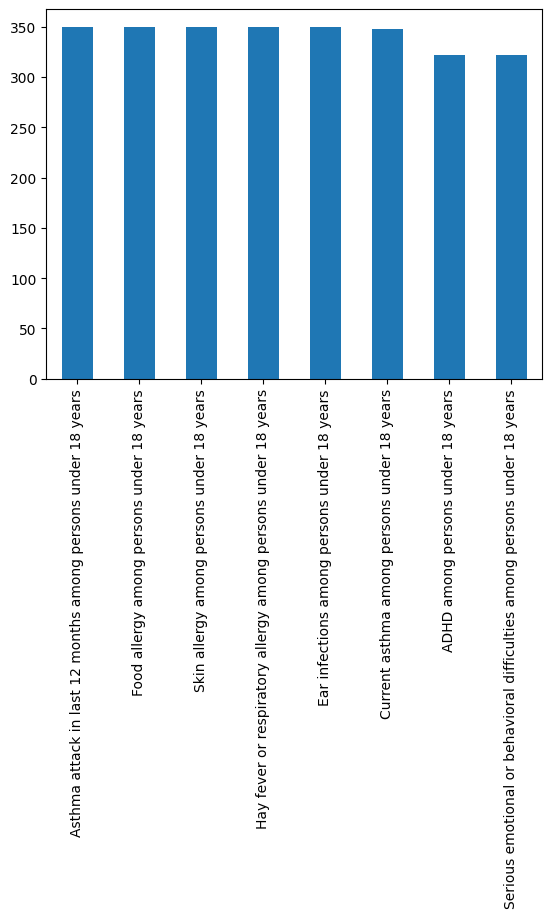

In [40]:
health_df['PANEL'].value_counts().plot(kind='bar')

<AxesSubplot:>

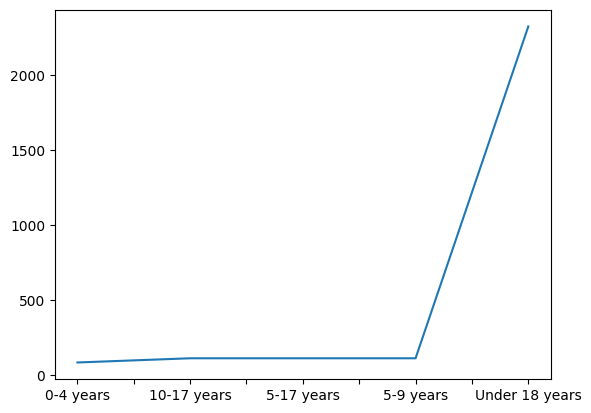

In [42]:
health_df['AGE'].value_counts().sort_values().plot()